In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
    if 'txt' in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

In [ ]:
#트레인 파일 불러오기
train_data = pd.read_csv(DATA_PATH + 'TRAINSET.txt', header = 0, delimiter = '\t', quoting=3, encoding='cp949')
train_data.head()

In [ ]:
print('학습데이터 전체 개수: {}'.format(len(train_data)))

In [ ]:
#리뷰 전체길이 확인
train_length = train_data['발화'].astype(str).apply(len)
train_length.head()

In [ ]:
#리뷰 통계 정보
print('데이터 길이 최댓값: {}'.format(np.max(train_length)))
print('데이터 길이 최솟값: {}'.format(np.min(train_length)))
print('데이터 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('데이터 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('데이터 길이 중간값: {}'.format(np.median(train_length)))
print('데이터 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('데이터 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

In [ ]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['발화'] if type(review) is str]
train_review

In [ ]:
# 데이터에서 많이 나오는 단어들
wordcloud = WordCloud(DATA_PATH+'Tenada.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# 불안 0, 분노 1, 기쁨 2

print('불안 데이터 갯수: {}'.format(train_data['감정'].value_counts()[0]))
print('분노 데이터 갯수: {}'.format(train_data['감정'].value_counts()[1]))
print('기쁨 데이터 갯수: {}'.format(train_data['감정'].value_counts()[2]))

In [7]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/'
train_data = pd.read_csv(DATA_PATH + 'TRAINSET.txt', header = 0, delimiter = '\t', quoting=3, encoding='cp949')

train_data['발화'][:10]

0    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고.더 좋은 회사가 기다리고 있을지...
1    요즘 직장생활이 너무 편하고 좋은 것 같아!우리 회사는 복지가 정말 좋아! 내가 곧...
2    취업해야 할 나이인데 취업하고 싶지가 않아.아직 조금 더 놀고 싶은 마음이 커. 인...
3    우리 회사는 정말 사내 분위기가 좋아.즐거운 일이 매일 생길 거 같은 기분이야. 내...
4    오늘 내가 다니는 회사가 참 좋은 직장이라는 생각이 들었어.회사에서 내가 제안한 프...
5    회사에서 전공시험을 봤어. 오늘 시험 결과가 나왔어.열심히 준비한 만큼 원하던 점수...
6          오늘 입사 면접을 봤어.면접을 잘 본 것 같아! 그 회사에 취업할 수 있겠어.
7    회사에서 나를 참 신뢰하는 것 같아. 그건 기분이 좋아.당연히 내가 업무를 잘 처리...
8    먼저 취업한 선배가 면접 비결을 알려줬어. 곧 면접 보러 가는데 든든해.면접 볼 때...
9    직장 상사로부터 칭찬을 받았는데 너무 신이 나!다른 사람이 실수한 일을 내가 깔끔하...
Name: 발화, dtype: object

In [8]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
  #함수인자설명
  # review : 전처리할 텍스트
  # okt : okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword : 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words : 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  #1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [9]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['발화']:
  # 데이터가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words= stop_words))
  else:
    clean_train_review.append([]) # str이 아닌 행은 빈칸으로 놔두기  

clean_train_review[:4]

[['퇴사',
  '지다',
  '얼마',
  '안',
  '돼다',
  '천천히',
  '직장',
  '을',
  '구',
  '해보다',
  '더',
  '좋다',
  '회사',
  '기다리다',
  '있다',
  '모르다',
  '쉬',
  '고',
  '있다',
  '좀',
  '그렇다'],
 ['요즘',
  '직장',
  '생활',
  '너무',
  '편하다',
  '좋다',
  '같다',
  '회사',
  '복지',
  '정말',
  '좋다',
  '내',
  '곧',
  '출산',
  '하다',
  '되다',
  '육아휴직',
  '기간',
  '도',
  '기다',
  '데',
  '다가',
  '소정',
  '지원',
  '금도',
  '제공',
  '해주다'],
 ['취업',
  '하다',
  '하다',
  '나이',
  '인데',
  '취업',
  '하고',
  '싶다',
  '않다',
  '아직',
  '조금',
  '더',
  '놀다',
  '싶다',
  '마음',
  '크다',
  '인생',
  '기다',
  '꼭',
  '빨리',
  '취업',
  '하다',
  '하다',
  '싶다'],
 ['우리',
  '회사',
  '정말',
  '사내',
  '분위기',
  '좋다',
  '즐겁다',
  '일이',
  '매일',
  '생기다',
  '거',
  '같다',
  '기분',
  '이야',
  '내',
  '원하다',
  '진로',
  '로',
  '취업',
  '하다',
  '더',
  '그렇다',
  '거',
  '같다']]

In [10]:
# 테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'TESTCASE.txt', header = 0, delimiter='\t', quoting=3, encoding='cp949')

clean_test_review = []
for review in test_data['발화']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])
    
print(clean_test_review)

[['동업', '하다', '친구', '내다', '부탁', '일이', '있다', '거의', '다', '하다', '느긋하다', '마무리', '하다', '중이', '야', '맞다', '열심히', '하다', '친구', '도', '만족스럽다'], ['부하', '직원', '있다', '너무', '일도', '잘', '하다', '신뢰', '가일', '도', '잘', '하다', '너무', '좋다'], ['삼', '년', '동안', '준비', '자격증', '시험', '드디어', '합격', '하다', '눈물', '나다', '합격', '이라는', '문구', '보고', '그동안', '고생', '잊다', '눈물', '나다'], ['서먹서먹하다', '친구', '에게서', '어젯밤', '에', '연락', '오다', '이번', '주말', '에', '만나다', '그동안', '못', '하다', '얘기', '를', '해보다', '하다', '정말', '기쁘다'], ['부모님', '지원', '으로', '졸업', '후', '에도', '여유롭다', '공부', '하다', '하다', '싶다', '일', '을', '찾다', '감사하다', '맞다', '대학원', '을', '가다', '부모님', '도움', '없다', '어렵다', '얼른', '취업', '하고', '부모님', '께', '효도', '도', '많이', '하다', '싶다'], ['미리', '일해', '놓다', '덕분', '에', '마감', '시간', '에', '쫓기다', '않다', '일', '을', '마무리', '하다', '일이', '다', '끝나다', '홀가분하다', '편안', '해일', '을', '마무리', '나', '자신', '을', '위해', '커피', '한잔', '사주다'], ['손발', '자다', '맞다', '팀원', '과', '일', '을', '하다', '되어다', '기쁘다', '맞다', '회사', '에서', '일', '을', '하다', '게', '이렇게', '마음', '편하다', '건', '처음', '이야', '협조', '적', '이고', 

In [11]:
# 수정

# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
from keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index # 단어사전형태
MAX_SEQUENCE_LENGTH = 8 # 문장 최대 길이

# 학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
# 학습 데이터 라벨 벡터화
train_labels = np.array(train_data['감정'])

# 평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
# 평가 데이터 라벨 벡터화
test_label_data = np.array(test_data['감정'])
test_labels = to_categorical(test_label_data, num_classes=3) # 수정할 부분 : 출력 차원

In [12]:
DEFAULT_PATH  = 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/' # 경로지정
DATA_PATH = 'CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

In [13]:
# 학습 데이터 불러오기
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

# 전처리 데이터 불러오기
DATA_PATH = 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/CLEAN_DATA/'
DATA_OUT = 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'), allow_pickle=True)
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'), allow_pickle=True)
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

In [14]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

In [15]:
# 수정

class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                                activation = tf.keras.activations.relu,
                                kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=3,  # 수정할 부분 : 출력 차원 변경
                                activation=tf.keras.activations.softmax,  # 활성화 함수 변경
                                kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))

    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x


In [16]:
# 수정

from keras.models import save_model
from keras.utils import to_categorical
from keras.layers import Dense

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')])

train_label = to_categorical(train_label, num_classes=3) # 수정할 부분

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name + '\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

save_model(model, 'C:/Users/MJ/Desktop/MyValue/NLP/Model_/')


C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/10
140/140 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.6500
Epoch 1: val_accuracy improved from -inf to 0.79497, saving model to C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/cnn_classifier_kr\weights.h5
140/140 [==============================] - 13s 73ms/step - loss: 0.8222 - accuracy: 0.6500 - val_loss: 0.5911 - val_accuracy: 0.7950
Epoch 2/10
140/140 [==============================] - ETA: 0s - loss: 0.6464 - accuracy: 0.7393
Epoch 2: val_accuracy did not improve from 0.79497
140/140 [==============================] - 10s 73ms/step - loss: 0.6464 - accuracy: 0.7393 - val_loss: 0.6776 - val_accuracy: 0.7698
Epoch 3/10
140/140 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.7692
Epoch 3: val_accuracy did not improve from 0.79497
140/140 [==============================] - 10s 68ms/step - loss: 0.5814 - accuracy: 0.7692 - va

INFO:tensorflow:Assets written to: C:/Users/MJ/Desktop/MyValue/NLP/Model_/assets


In [17]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/cnn_classifier_kr/weights.h5')
model.evaluate(test_input, test_label_data)

32/32 [==============================] - 0s 2ms/step - loss: 0.9333 - accuracy: 0.5594


[0.9332758188247681, 0.5594059228897095]

In [ ]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 # 문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

print(sentence)

model.load_weights('C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/cnn_classifier_kr/weights.h5') # 모델 불러오기
predictions = model.predict(pad_new)

print(predictions)

In [ ]:
import numpy as np

# 주어진 결과값
emotions = np.array(predictions)

# 감정 레이블
emotion_labels = ['불안', '분노', '기쁨']

# 감정 요약 함수
def summarize_emotion(emotions, threshold=0.35):
    summary = []
    for e in emotions:
        dominant_emotion = np.argmax(e)  # 가장 높은 점수의 감정 인덱스
        if e[dominant_emotion] > threshold:  # 임계값 이상의 점수만을 고려
            summary.append(emotion_labels[dominant_emotion])
    return summary

# 전체적인 기분 요약
overall_summary = summarize_emotion(emotions)
print(overall_summary)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 실제 감정 데이터와 레이블
emotions = np.array(predictions)
emotion_labels = ['Anxiety', 'Anger', 'Pleasure']

# 실제 요약된 감정 데이터
overall_summary = summarize_emotion(emotions)

# 요약된 감정 빈도 계산
emotion_counts = {emotion: overall_summary.count(emotion) for emotion in emotion_labels}

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(emotion_labels, [emotion_counts[emotion] for emotion in emotion_labels], color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Graph')
plt.show()


19/19 [==============================] - 0s 3ms/step
['기쁨', '불안', '불안', '불안', '불안', '불안', '불안', '기쁨', '불안', '분노', '불안', '분노', '분노', '불안', '분노', '불안', '분노', '불안', '기쁨', '기쁨', '분노', '기쁨', '불안', '불안', '기쁨', '불안', '분노', '기쁨', '기쁨', '불안', '기쁨', '기쁨', '기쁨', '분노', '분노', '불안', '분노', '분노', '불안', '불안', '기쁨', '불안', '기쁨', '기쁨', '기쁨', '불안', '불안', '기쁨', '분노', '불안', '불안', '기쁨', '불안', '기쁨', '분노', '분노', '기쁨', '기쁨', '분노', '기쁨', '기쁨', '기쁨', '기쁨', '기쁨', '기쁨', '기쁨', '불안', '분노', '분노', '불안', '분노', '분노', '기쁨', '불안', '기쁨', '기쁨', '불안', '분노', '기쁨', '불안', '불안', '기쁨', '기쁨', '기쁨', '분노', '분노', '불안', '분노', '기쁨', '기쁨', '기쁨', '불안', '불안', '기쁨', '기쁨', '불안', '분노', '분노', '불안', '불안', '분노', '불안', '기쁨', '불안', '기쁨', '기쁨', '분노', '불안', '불안', '불안', '불안', '불안', '기쁨', '불안', '기쁨', '분노', '불안', '기쁨', '불안', '분노', '불안', '분노', '불안', '기쁨', '불안', '불안', '불안', '기쁨', '불안', '불안', '분노', '불안', '불안', '분노', '불안', '불안', '불안', '불안', '불안', '불안', '불안', '불안', '불안', '기쁨', '분노', '불안', '분노', '불안', '불안', '기쁨', '불안', '불안', '기쁨', '불안', '분노', '기쁨', '기쁨', '분노'

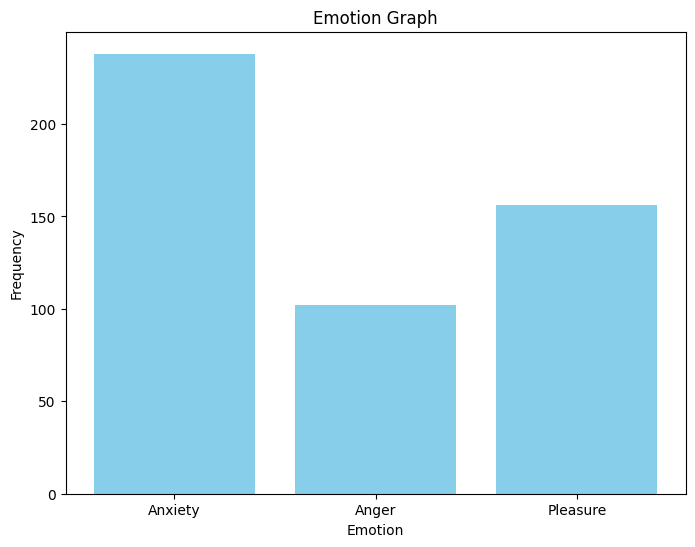

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from konlpy.tag import Okt
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/CLEAN_DATA/'+DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 # 문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('C:/Users/MJ/Desktop/MyValue/NLP/Model_/data/DATA_OUT/cnn_classifier_kr/weights.h5') # 모델 불러오기
predictions = model.predict(pad_new)

# print(sentence)
# print(predictions)

# 주어진 결과값
emotions = np.array(predictions)

# 감정 레이블
emotion_labels = ['불안', '분노', '기쁨']

# 감정 요약 함수
def summarize_emotion(emotions, threshold=0.35): # 임계값 설정
    summary = []
    for e in emotions:
        dominant_emotion = np.argmax(e)  # 가장 높은 점수의 감정 인덱스
        if e[dominant_emotion] > threshold:  # 임계값 이상의 점수만을 고려
            summary.append(emotion_labels[dominant_emotion])
    return summary

# 전체적인 기분 요약
overall_summary = summarize_emotion(emotions)
print(overall_summary)

# 실제 감정 데이터와 레이블
emotions = np.array(predictions)
emotion_labels = ['Anxiety', 'Anger', 'Pleasure']

# 실제 요약된 감정 데이터
overall_summary = summarize_emotion(emotions)

# 요약된 감정 빈도 계산
emotion_counts = {emotion: overall_summary.count(emotion) for emotion in emotion_labels}

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(emotion_labels, [emotion_counts[emotion] for emotion in emotion_labels], color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Graph')
plt.show()
